# Collaborative Filtering Recommender

**The recommender system** is used to predict user preference for a set of items based on the past experience.

There are two common types: Content-Based and Collaborative Filtering.

**Collaborative filtering** filters out items that a user might like on the basis of reactions of similar users. It has two algorithm types: memory based and model based.

- **Memory based algorithms** apply statistical techniques to the entire dataset to calculate the predictions. They can be divided into two main sections: user-item filtering and item-item filtering. The closest users or items are calculated only by using Cosine similarity or Pearson correlation coefficients, which are solely based on arithmetic operations.

- **Model based algorithms** involve building machine learning algorithms to predict user's ratings. They involve dimensionality reduction methods that reduce high dimensional matrix containing abundant number of missing values with a much smaller matrix in lower-dimensional space.

In this code, we introduced the both types of algorithms (Memory and Model based algorithms). 

We compared them by performing cross validation and evaualating them useing RMSE and MAE and choose the best one. Then, explore obtained results.

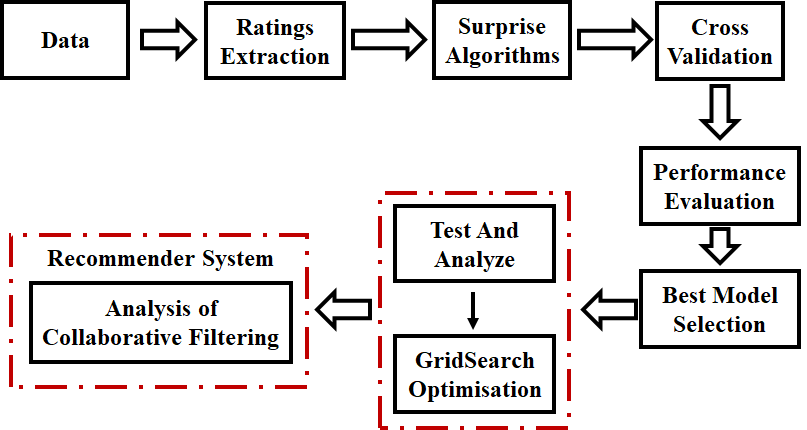




In [1]:
!pip install surprise

     |████████████████████████████████| 11.8MB 12.5MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617543 sha256=aa3e34ff7d2c145382136d8058c2ea54fc1b84489a29f4fa28d0db18739c6ecf
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [2]:
from surprise import Reader, Dataset 
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore,KNNBaseline, NormalPredictor
from surprise import SVD, SVDpp, BaselineOnly, NMF, SlopeOne, CoClustering, accuracy
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from datetime import datetime
import os
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Now, we add our dataset here. To do that we need to upload the csv file on google colab
from google.colab import files
uploaded = files.upload()

Saving attraction_new.csv to attraction_new.csv


In [4]:
data_df = pd.read_csv('attraction_new.csv')
data_df.head()

,location_id,location_name,location_type,type_id,ratings,no. of rating,provience,cost,user_id,best_time_to_visit,visiting_hours,Address,Website_link,image_link
0,0,Ripley's Aquarium of Canada,Aquariums,4,4.5,"20,326",ontario,15$,1,summer,Sun - Sat 10:00 AM - 8:00 PM,"288 Bremner Boulevard, Toronto, Ontario M5V 3L...",http://www.ripleyaquariums.com/canada,https://dynamic-media-cdn.tripadvisor.com/medi...
1,1,Mount Royal Park,Parks,2,3.0,"10,493",quebec,5$,1,fall,Sun - Sat 6:00 AM - 12:00 AM,"1260 Remembrance Road, Montreal, Quebec H3H 1A...",http://www.lemontroyal.qc.ca/en,https://dynamic-media-cdn.tripadvisor.com/medi...
2,2,Stanley Park,Parks,2,4.5,"28,722",BC,free,1,all time,Sun-Sat 8:00 AM- 6:00 PM,"Stanley Park Causeway, Vancouver, British Colu...",http://vancouver.ca/parks-recreation-culture/s...,https://dynamic-media-cdn.tripadvisor.com/medi...
3,3,Niagara Falls Canada,Points of Interest & Landmarks Waterfalls,4,1.0,"31,476",ontario,free,2,all time,Thu - Thu 12:00 AM - 11:59 PM,"Niagara Falls, Ontario L2G 3Y9 Canada",https://www.niagarafallstourism.com/,https://dynamic-media-cdn.tripadvisor.com/medi...
4,4,Old Quebec,Neighbourhoods Historic Walking Areas,5,5.0,"13,360",quebec,10$,2,summer,Sun - Sat 10:00 AM - 8:00 PM,"Rue de Tresor, Quebec City, Quebec GIR 5B8 Canada",http://whc.unesco.org/en/list/300,https://dynamic-media-cdn.tripadvisor.com/medi...


In [5]:
#df=data_df[['location_id','type_id','user_id','ratings','no. of rating']]
df=data_df[['location_id','type_id','ratings','no. of rating']]
df.head()


,location_id,type_id,ratings,no. of rating
0,0,4,4.5,"20,326"
1,1,2,3.0,"10,493"
2,2,2,4.5,"28,722"
3,3,4,1.0,"31,476"
4,4,5,5.0,"13,360"


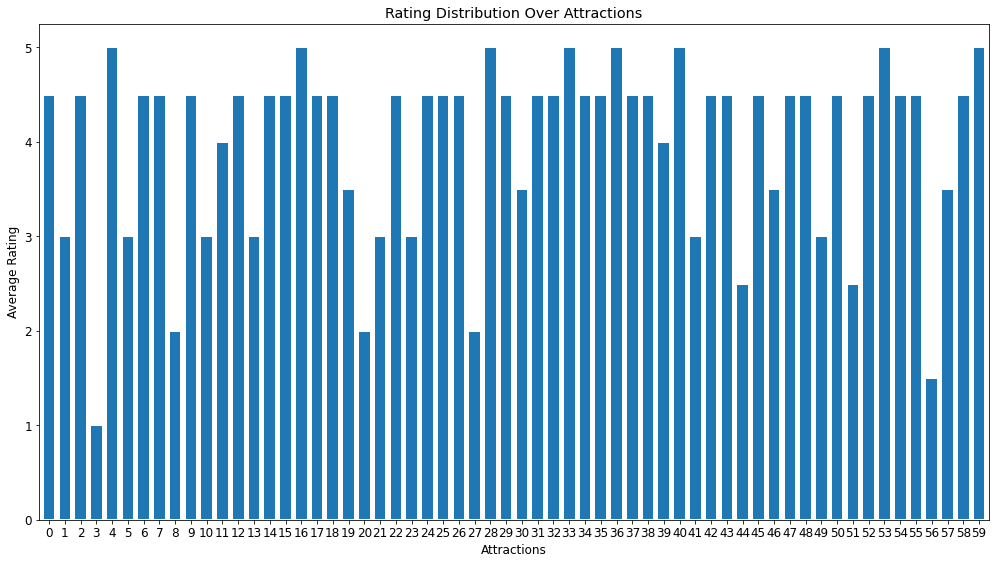

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
ax = df['ratings'].plot.bar(fontsize=12, xlabel='Attractions',
                            ylabel='Average Rating', width=0.8,rot=0,
                            figsize=(14,8),title="Rating Distribution Over Attractions",alpha=1,
                            edgecolor='white', linewidth=2)

plt.tight_layout()
plt.show(block=True)
import pylab as plot
params = {'legend.fontsize': 18,
          'legend.handlelength': 4} 
plot.rcParams.update(params)

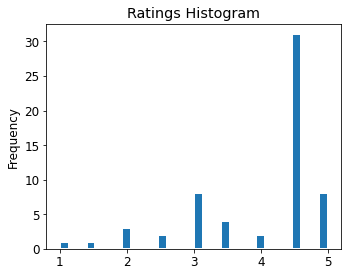

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
ax = df['ratings'].plot.hist(fontsize=12, xlabel='Attractions',
                            ylabel='Average Rating', rot=0,
                            figsize=(5,4),title="Ratings Histogram",alpha=1,
                            edgecolor='white', linewidth=2,bins=30)


plt.tight_layout()
plt.show(block=True)
import pylab as plot
params = {'legend.fontsize': 18,
          'legend.handlelength': 4} 
plot.rcParams.update(params)

In [7]:
# Use Reader class to parse the ratings.
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df[['type_id','location_id','ratings']], reader)

**Perform cross validation**

Surprise package offers several variations of the model. The comparison of those models will be performed in this section and then we will choose the best modeld based on the best performance in terms of RMSE error and is not that time-consuming when it comes to fitting it.

In [ ]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), 
                  KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(),
                  BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=3, verbose=False,return_train_measures=True)
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [ ]:
print('3 Fold Cross Validation Result sorted based on Test_RMSE (ascending)\n')
surprise_results = pd.DataFrame(benchmark).set_index('fit_time').sort_values('test_rmse', ascending=True)
surprise_results

3 Fold Cross Validation Result sorted based on Test_RMSE (ascending)



,test_rmse,train_rmse,test_mae,train_mae,test_time,Algorithm
fit_time,,,,,,
0.004076,0.971618,0.000000,0.812083,0.000000,0.000216,KNNWithZScore
0.000167,0.973790,0.000000,0.812917,0.000000,0.000230,KNNBasic
0.006128,0.974338,0.168135,0.812083,0.132816,0.000238,NMF
0.000376,0.974649,0.000000,0.816250,0.000000,0.000165,KNNWithMeans
0.003369,0.982302,0.693551,0.819130,0.572815,0.000211,SVD
0.000235,0.989690,0.200111,0.830000,0.163826,0.000215,SlopeOne
0.012379,0.991510,0.479026,0.828750,0.389883,0.000341,CoClustering
0.000374,0.996201,0.858753,0.825287,0.715221,0.000165,BaselineOnly
0.002574,1.001411,0.000000,0.839494,0.000000,0.000193,KNNBaseline


In [ ]:
print('3 Fold Cross Validation Result sorted based on fit_time (ascending)\n')
#surprise_results = pd.DataFrame(benchmark).set_index('fit_time').sort_values('fit_time', ascending=True)
surprise_results = pd.DataFrame(benchmark).sort_values('fit_time', ascending=True)
surprise_results

3 Fold Cross Validation Result sorted based on fit_time (ascending)



,test_rmse,train_rmse,test_mae,train_mae,fit_time,test_time,Algorithm
4,1.403521,1.308615,1.177690,1.056864,0.000108,0.000216,NormalPredictor
6,0.973790,0.000000,0.812917,0.000000,0.000167,0.000230,KNNBasic
2,0.989690,0.200111,0.830000,0.163826,0.000235,0.000215,SlopeOne
9,0.996201,0.858753,0.825287,0.715221,0.000374,0.000165,BaselineOnly
7,0.974649,0.000000,0.816250,0.000000,0.000376,0.000165,KNNWithMeans
5,1.001411,0.000000,0.839494,0.000000,0.002574,0.000193,KNNBaseline
0,0.982302,0.693551,0.819130,0.572815,0.003369,0.000211,SVD
8,0.971618,0.000000,0.812083,0.000000,0.004076,0.000216,KNNWithZScore
3,0.974338,0.168135,0.812083,0.132816,0.006128,0.000238,NMF
1,1.005306,0.705921,0.841459,0.589317,0.008206,0.000153,SVDpp


In [ ]:
# Function to visualize the cross validation results to compared the models based on 
# RSME/MAE and Test_Time/Fit_Time
def CV_Results_Visulaization(results,ye,yt,title,time):
    fig, ax1 = plt.subplots(figsize=(10, 7))
    plt.xticks(rotation=90)
    palette = sns.color_palette("RdBu", len(results))
    sns.barplot(x='Algorithm', y=ye, data=results, palette=palette, ax=ax1)
    ax1.set_title(title,fontsize = 12,fontweight='bold')
    ax2 = ax1.twinx()
    sns.scatterplot(x='Algorithm', y=yt, data=results, color='black', ax=ax2)
    ax2.set(ylim=(0, results[time].max() * 1.1))
    plt.show()

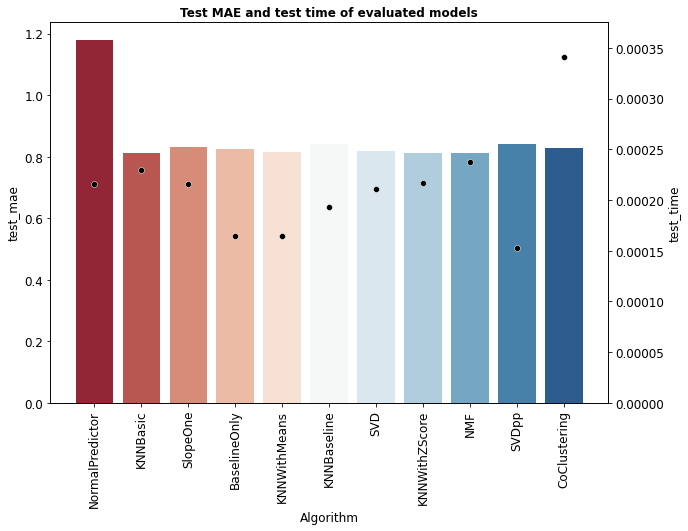

In [ ]:
title='Test MAE and test time of evaluated models'
ye='test_mae'
time='test_time'
yt='test_time'
CV_Results_Visulaization(surprise_results,ye,yt,title,time)

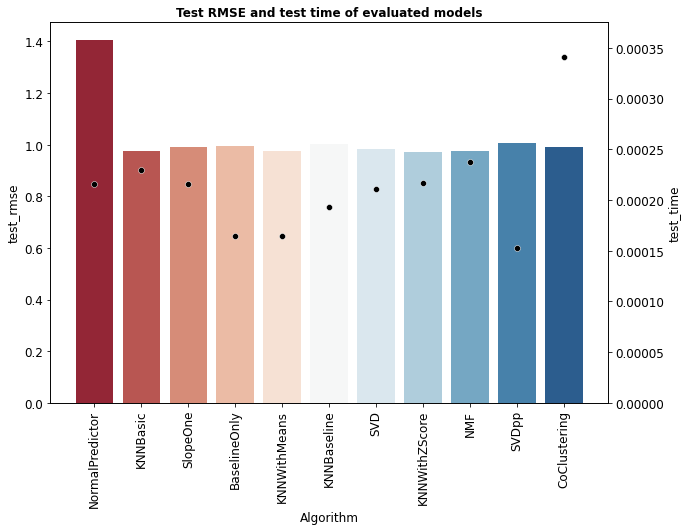

In [ ]:
title='Test RMSE and test time of evaluated models'
ye='test_rmse'
time='test_time'
yt='test_time'
CV_Results_Visulaization(surprise_results,ye,yt,title,time)

## KNN Model Selection

K-Nearest Neighbours algorithm calculates the distances between users or items and finds the closest ones = the most similar ones. Surprise package offers several variations of the model. The comparison of those models shows that KNNWithZScore algorithm gives the best performance in terms of RMSE error.

KNNWithZScore model will be tested in further analysis with different similarity metrics and  item-item approach.

In [ ]:
def generate_models_dict(models, sim_names, user_based):
    models_dict = {}

    for sim_name in sim_names:
        sim_dict = {
            'name': sim_name,
            'user_based': user_based
        }
        for model in models:
            model_name = get_model_name(model) + ' ' + sim_name
            models_dict[model_name] = model(sim_options=sim_dict)

    return models_dict

In [ ]:
def get_model_name(Algorithm):
    return str(Algorithm).split('.')[-1].split(' ')[0].replace("'>", "")

In [ ]:
def cv_multiple_models(data, models_dict, cv=3):
    results = pd.DataFrame()

    for model_name, Algorithm in models_dict.items():
        print('\n---> CV for %s...' % model_name)

        cv_results = cross_validate(Algorithm, data, cv=cv)
        tmp = pd.DataFrame(cv_results).mean()
        tmp['Algorithm'] = model_name
        results = results.append(tmp, ignore_index=True)

    return results

## Item-Item Model Selection

Item-Item approach is to determine a set of the most similar items to the item I (based on the past ratings of other users) and to calculate the rating for the item I based on the ratings of similar items rated by the user U.

As before, Pearson correlation coefficient gives the best results in terms of both RMSE and MAE. By using item-item approach the results of the algorithm were improved compared to the previous iteration.

In [ ]:
knn_models = generate_models_dict([KNNWithZScore], ['cosine', 'msd', 'pearson'], False)
knn_results = cv_multiple_models(data, knn_models)
knn_models = None
knn_results.sort_values('test_rmse', ascending=True)


---> CV for KNNWithZScore cosine...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.

---> CV for KNNWithZScore msd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

---> CV for KNNWithZScore pearson...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


,Algorithm,fit_time,test_mae,test_rmse,test_time
2,KNNWithZScore pearson,0.003642,0.807083,0.968414,0.000216
0,KNNWithZScore cosine,0.003781,0.833750,0.971889,0.000217
1,KNNWithZScore msd,0.002779,0.850417,0.994243,0.000186


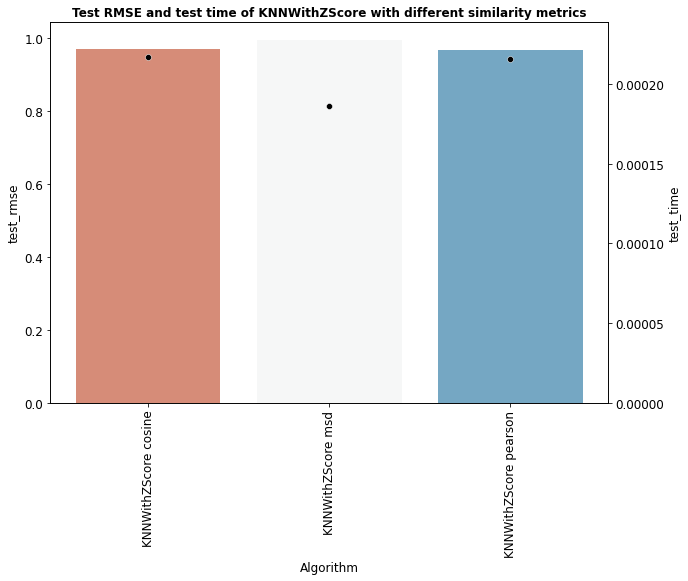

In [ ]:
title='Test RMSE and test time of KNNWithZScore with different similarity metrics'
ye='test_rmse'
time='test_time'
yt='test_time'
CV_Results_Visulaization(knn_results,ye,yt,title,time)

## KNNWithZScore Model Optimisation with GridSearch CV

Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.

The best set of parameters (in terms of RMSE) obtained by GridSearch:
* KNNWithZScore, item-item, Pearson similarity metric
* k = 40
* min_k = 1
* min_support = 1
* RMSE= 0.9692251202388923

In [ ]:
param_grid = {'k': [40,45,50,55],
              'min_k': [1,3,5,8],
              'sim_options': {'name': ['pearson'],'min_support': [1, 5],'user_based': [False]}
              }
gridsearch = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=3)
gridsearch.fit(data)
print(gridsearch.best_score['rmse'])
print(gridsearch.best_params['rmse'])

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

## Analysis of Collaborative Filtering model results

In this part, let's examine in detail the results obtained by the KNN model that provided the best RMSE score.

In [25]:
trainset, testset = train_test_split(data, test_size=0.25)
sim_options = {'name': 'pearson','user_based': False,'min_support': 1}
model = KNNWithZScore(k=40, min_k=1, sim_options=sim_options)
predictions = model.fit(trainset).test(testset)
accuracy.rmse(predictions)
print(model.__class__.__name__)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0488
KNNWithZScore


In [26]:
#trainset = data.build_full_trainset() 
model = KNNWithZScore(k=40, min_k=1, sim_options=sim_options)
model.fit(trainset)
#testset = trainset.build_anti_testset()
predictions = model.test(testset)
accuracy.rmse(predictions)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0488


1.0488088481701516

trainset, testset = train_test_split(data, test_size=0.2)

sim_options = {
    'name': 'pearson',
    'user_based': False,
    'min_support': 1
}

model = KNNWithMeans(k=50, min_k=5, sim_options=sim_options)
model.fit(trainset)
predictions = model.test(testset)

In [11]:
def k_from_details(details):
    try:
        return details['actual_k']
    except KeyError:
        return 1000

In [27]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'location_id', 'actual_rating', 'pred_rating', 'details'])
df_pred['k'] = df_pred['details'].apply(k_from_details)
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

,user_id,location_id,actual_rating,pred_rating,k,impossible,pred_rating_round,abs_err
14,4,28,5.0,4.0,1000,True,4.0,1.0
10,5,7,4.5,4.0,1000,True,4.0,0.5
2,5,57,3.5,4.0,1000,True,4.0,0.5
3,7,47,4.5,4.0,1000,True,4.0,0.5
4,2,45,4.5,4.0,1000,True,4.0,0.5


In [28]:
best_predictions = df_pred.sort_values(by='abs_err')[:10]
best_predictions

,user_id,location_id,actual_rating,pred_rating,k,impossible,pred_rating_round,abs_err
0,4,18,4.5,4.0,1000,True,4.0,0.5
2,5,57,3.5,4.0,1000,True,4.0,0.5
3,7,47,4.5,4.0,1000,True,4.0,0.5
4,2,45,4.5,4.0,1000,True,4.0,0.5
5,4,32,4.5,4.0,1000,True,4.0,0.5
7,2,55,4.5,4.0,1000,True,4.0,0.5
8,2,12,4.5,4.0,1000,True,4.0,0.5
10,5,7,4.5,4.0,1000,True,4.0,0.5
11,4,0,4.5,4.0,1000,True,4.0,0.5
1,7,36,5.0,4.0,1000,True,4.0,1.0


In [29]:
worst_predictions = df_pred.sort_values(by='abs_err')[-10:]
worst_predictions

,user_id,location_id,actual_rating,pred_rating,k,impossible,pred_rating_round,abs_err
7,2,55,4.5,4.0,1000,True,4.0,0.5
8,2,12,4.5,4.0,1000,True,4.0,0.5
10,5,7,4.5,4.0,1000,True,4.0,0.5
11,4,0,4.5,4.0,1000,True,4.0,0.5
1,7,36,5.0,4.0,1000,True,4.0,1.0
9,7,23,3.0,4.0,1000,True,4.0,1.0
13,2,41,3.0,4.0,1000,True,4.0,1.0
14,4,28,5.0,4.0,1000,True,4.0,1.0
6,1,8,2.0,4.0,1000,True,4.0,2.0
12,9,56,1.5,4.0,1000,True,4.0,2.5


### Distribution of actual and predicted ratings in the test set

- According to the distribution of actual ratings of attractions in the test set, the biggest part of users give positive scores (around 4.5). 
- The distribution of predicted ratings in the test set is visibly different.
- It shows that the recommender system is not perfect and it cannot reflect the real distribution of attraction ratings.

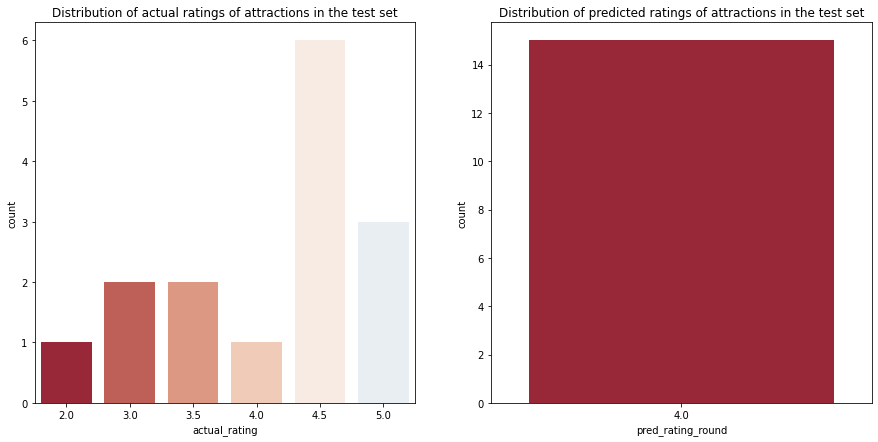

In [22]:
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of attractions in the test set')
sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of attractions in the test set')
plt.show()

### Absolute error of predicted ratings

The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1.5. 

How good/bad the model is with predicting certain scores? 
As expected from the above charts, the model deals very well with predicting score = 4.5 (the most frequent value). The further the rating from score = 4.5, the higher the absolute error. The biggest errors happen to observations with scores 2 or 2=3 which indicates that probably the model is predicting high ratings for those observations. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


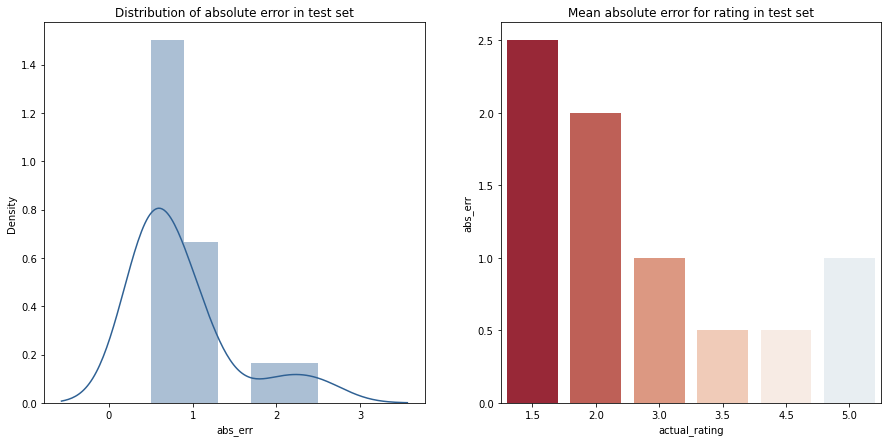

In [30]:
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')
sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')
plt.show()

In [ ]:
def get_all_predictions(predictions):
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
        
    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n

In [ ]:
trainset1 = data.build_full_trainset() 
model = KNNWithZScore(k=40, min_k=1, sim_options=sim_options)
model.fit(trainset1)
testset1 = trainset.build_anti_testset()
predictions1 = model.test(testset1)
accuracy.rmse(predictions)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7106


0.710590086903088

In [ ]:
all_pred = get_all_predictions(predictions1)

In [ ]:
#To get top 5 reommendation
n = 5
for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_pred[uid] = user_ratings[:n]

In [ ]:
#tmp = pd.DataFrame.from_dict(all_pred,orient='index')
tmp = pd.DataFrame.from_dict(all_pred)
tmp_transpose = tmp.transpose()

In [ ]:
def get_predictions(user_id):
    results = tmp_transpose.loc[user_id]
    return results

In [ ]:
#specifying the user
user_id= 4
results = get_predictions(user_id)
results

0     (40, 5)
1     (36, 5)
2     (16, 5)
3      (4, 5)
4    (9, 4.5)
Name: 4, dtype: object

In [ ]:

recommended_attraction_ids=[]
for x in range(0, n):
    recommended_attraction_ids.append(results[x][0])

recommended_attraction_ids

[40, 36, 16, 4, 9]

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving attraction_new.csv to attraction_new (1).csv


In [ ]:
attractions_df = pd.read_csv('attraction_new.csv')
attractions_df.head()

,location_id,location_name,location_type,type_id,ratings,no. of rating,provience,cost,user_id,best_time_to_visit,visiting_hours,Address,Website_link,image_link
0,0,Ripley's Aquarium of Canada,Aquariums,4,4.5,"20,326",ontario,15$,1,summer,Sun - Sat 10:00 AM - 8:00 PM,"288 Bremner Boulevard, Toronto, Ontario M5V 3L...",http://www.ripleyaquariums.com/canada,https://dynamic-media-cdn.tripadvisor.com/medi...
1,1,Mount Royal Park,Parks,2,3.0,"10,493",quebec,5$,1,fall,Sun - Sat 6:00 AM - 12:00 AM,"1260 Remembrance Road, Montreal, Quebec H3H 1A...",http://www.lemontroyal.qc.ca/en,https://dynamic-media-cdn.tripadvisor.com/medi...
2,2,Stanley Park,Parks,2,4.5,"28,722",BC,free,1,all time,Sun-Sat 8:00 AM- 6:00 PM,"Stanley Park Causeway, Vancouver, British Colu...",http://vancouver.ca/parks-recreation-culture/s...,https://dynamic-media-cdn.tripadvisor.com/medi...
3,3,Niagara Falls Canada,Points of Interest & Landmarks Waterfalls,4,1.0,"31,476",ontario,free,2,all time,Thu - Thu 12:00 AM - 11:59 PM,"Niagara Falls, Ontario L2G 3Y9 Canada",https://www.niagarafallstourism.com/,https://dynamic-media-cdn.tripadvisor.com/medi...
4,4,Old Quebec,Neighbourhoods Historic Walking Areas,5,5.0,"13,360",quebec,10$,2,summer,Sun - Sat 10:00 AM - 8:00 PM,"Rue de Tresor, Quebec City, Quebec GIR 5B8 Canada",http://whc.unesco.org/en/list/300,https://dynamic-media-cdn.tripadvisor.com/medi...


In [ ]:
attractions=attractions_df[['location_id','location_name','location_type','ratings','no. of rating','type_id']]
attractions.head()

,location_id,location_name,location_type,ratings,no. of rating,type_id
0,0,Ripley's Aquarium of Canada,Aquariums,4.5,"20,326",4
1,1,Mount Royal Park,Parks,3.0,"10,493",2
2,2,Stanley Park,Parks,4.5,"28,722",2
3,3,Niagara Falls Canada,Points of Interest & Landmarks Waterfalls,1.0,"31,476",4
4,4,Old Quebec,Neighbourhoods Historic Walking Areas,5.0,"13,360",5


In [ ]:
#getting the title of the recommended attractions
recommended_attractions = attractions[attractions['location_id'].isin(recommended_attraction_ids)]
recommended_attractions

,location_id,location_name,location_type,ratings,no. of rating,type_id
4,4,Old Quebec,Neighbourhoods Historic Walking Areas,5.0,"13,360",5
9,9,Toronto Island Park,Islands Parks,4.5,"8,437",9
16,16,Myra Canyon Park,State Parks Canyons,5.0,"1,648",7
36,36,Whistler Mountain Bike Park,Mountains Sports Complexes,5.0,588,7
40,40,Icefields Parkway,Scenic Drives,5.0,"1,845",7


In [ ]:
ratings_dict = {'attractionID': list(attractions_df.location_id),
                'typeID': list(attractions_df.type_id),
                'rating': list(attractions_df.ratings)}

df1 = pd.DataFrame(ratings_dict)
df1.head()

,attractionID,typeID,rating
0,0,4,4.5
1,1,2,3.0
2,2,2,4.5
3,3,4,1.0
4,4,5,5.0


In [ ]:
temp = df1[df1['typeID'] == 2].sort_values("rating", ascending = False)
temp.head()

,attractionID,typeID,rating
2,2,2,4.5
12,12,2,4.5
26,26,2,4.5
45,45,2,4.5
48,48,2,4.5


In [ ]:
history_attraction_ids = temp['attractionID']
user_history = attractions[attractions['location_id'].isin(history_attraction_ids)]

In [ ]:
user_history[:n]

,location_id,location_name,location_type,ratings,no. of rating,type_id
1,1,Mount Royal Park,Parks,3.0,"10,493",2
2,2,Stanley Park,Parks,4.5,"28,722",2
12,12,Peller Estates Winery,Wineries & Vineyards,4.5,"2,789",2
19,19,The Calgary Zoo,Nature & Wildlife Areas Zoos,3.5,"4,461",2
26,26,Springbank Park,Nature & Wildlife Areas Parks,4.5,466,2
